In [1]:
import os

os.chdir("../..")

In [2]:
folder = "examples/Starter Repo"

In [3]:
assert "src" not in os.listdir(folder), "src folder is already created, delete first"
folder = folder + "/src"

AssertionError: src folder is already created, delete first

In [ ]:
os.makedirs(folder)

In [ ]:
# Make a dummy repo that can be saved as an artifact in the library
# Then copy and paste it in

# But first start here with the repo so that we can actually see what it would look like to load and use it!!

In [4]:
os.chdir("..")

In [5]:
from MSML.src import load_from_json, create_action_chains_graph, write_out_boundary_actions, write_out_policies, write_out_mechanisms, load_svg_graphviz, write_basic_report_full
from IPython.display import display, display_html
from copy import deepcopy
from src import math_spec_json
ms = load_from_json(deepcopy(math_spec_json))

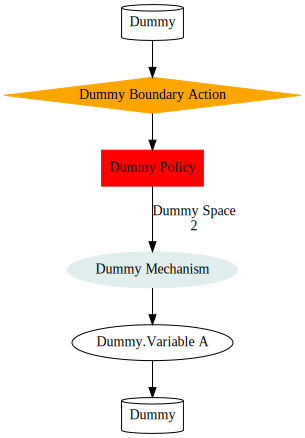

In [6]:
for behavior in ["Dummy Boundary Action"]:
    display(create_action_chains_graph(ms, [behavior], behavior))

In [14]:
write_basic_report_full(ms, "MSML/examples/Starter Repo/reports", "Basic Report")
